In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

c:\users\student\anaconda3\envs\py360\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\student\anaconda3\envs\py360\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\student\anaconda3\envs\py360\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\student\anaconda3\envs\py360\lib\site-packages\tensorflow\

In [2]:
# load data
mnist = input_data.read_data_sets('/tmp/tensorflow/mnist/input_data', one_hot=True)

Extracting /tmp/tensorflow/mnist/input_data\train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-labels-idx1-ubyte.gz


In [3]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [4]:
mnist.train.images.shape

(55000, 784)

In [5]:
# Create the model
x = tf.placeholder(tf.float32, [None,784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
k = tf.matmul(x, W) + b # k = h
y = tf.nn.softmax(k) # y = 예측치

In [6]:
# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None,10]) # y_ = 실측치
learning_rate = 0.5
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=k))
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
print("Training")

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

Training


In [7]:
sess = tf.Session()
init = tf.global_variables_initializer() # .run()
sess.run(init)
for _ in range(1000):
    # 1000번씩, 전체 데이터에서 100개씩 뽑아서 트레이닝을 함
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
print('b is ', sess.run(b))
print('W is ', sess.run(W))

b is  [-0.35004243  0.357071    0.0921426  -0.29487005  0.02151008  1.2899652
 -0.0973471   0.6579732  -1.416616   -0.25978428]
W is  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
print("Testing model")
# Test trained model
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
# reduce_mean(): 배열의 평균값을 구함
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('accuracy', sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
print('done')

Testing model
accuracy 0.9195
done


In [9]:
tf.reset_default_graph()

In [10]:
import numpy as np
np.random.seed(20160704)
tf.set_random_seed(20160704)

In [12]:
# define first layer
num_filters1 = 32
x = tf.placeholder(tf.float32, [None, 784])
x_image = tf.reshape(x, [-1,28,28,1])
W_conv1 = tf.Variable(tf.truncated_normal([5,5,1,num_filters1], stddev=0.1))
h_conv1 = tf.nn.conv2d(x_image, W_conv1, strides=[1,1,1,1], padding='SAME')
b_conv1 = tf.Variable(tf.constant(0.1, shape=[num_filters1]))
h_conv1_cutoff = tf.nn.relu(h_conv1 + b_conv1)
h_pool1 = tf.nn.max_pool(h_conv1_cutoff, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [13]:
# define second layer
num_filters2 = 64
W_conv2 = tf.Variable(tf.truncated_normal([5,5,num_filters1,num_filters2], stddev=0.1))
h_conv2 = tf.nn.conv2d(h_pool1, W_conv2, strides=[1,1,1,1], padding='SAME')
b_conv2 = tf.Variable(tf.constant(0.1, shape=[num_filters2]))
h_conv2_cutoff = tf.nn.relu(h_conv2 + b_conv2)
h_pool2 = tf.nn.max_pool(h_conv2_cutoff, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [14]:
# define fully connected layer
h_pool2_flat = tf.reshape(h_pool2, [-1,7*7*num_filters2])
num_units1 = 7*7*num_filters2
num_units2 = 1024
w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2]))
b2 = tf.Variable(tf.constant(0.1, shape=[num_units2]))
hidden2 = tf.nn.relu(tf.matmul(h_pool2_flat, w2) + b2)
keep_prob = tf.placeholder(tf.float32)
hidden2_drop = tf.nn.dropout(hidden2, keep_prob)
w0 = tf.Variable(tf.zeros([num_units2, 10]))
b0 = tf.Variable(tf.zeros([10]))
k = tf.matmul(hidden2_drop, w0) + b0
p = tf.nn.softmax(k)

In [16]:
# define loss (cost) function
t = tf.placeholder(tf.float32, [None, 10])
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=t, logits=k))
train_step = tf.train.AdamOptimizer(0.0001).minimize(loss)
correct_prediction = tf.equal(tf.argmax(p,1), tf.argmax(t,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [27]:
# prepare session
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
saver = tf.train.Saver()

In [22]:
# start training
i = 0
for _ in range(1000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(50)
    sess.run(train_step, feed_dict={x:batch_xs, t:batch_ts, keep_prob:0.5})
    if i % 500 == 0:
        loss_vals, acc_vals = [], []
        for c in range(4):
            start = len(mnist.test.labels) // 4 * c
            end = len(mnist.test.labels) // 4 * (c+1)
            loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x:mnist.test.images[start:end], t:mnist.test.labels[start:end],
                                                                     keep_prob:1.0})
            loss_vals.append(loss_val)
            acc_vals.append(acc_val)
        loss_val = np.sum(loss_vals)
        acc_val = np.mean(acc_vals)
        print('Step: %d, Loss: %f, Accuracy: %f' % (i, loss_val, acc_val))
saver.save(sess, 'c:/py_data/tensorflow/cnn_test/cnn_session')
sess.close()

Step: 500, Loss: 0.229794, Accuracy: 0.980600
Step: 1000, Loss: 0.193578, Accuracy: 0.984300


In [23]:
input_form = """
<table>
<td style="border-style: none;">
<div style="border: solid 2px #666; width: 143px; height: 144px;">
<canvas width="140" height="140"></canvas>
</div></td>
<td style="border-style: none;">
<button onclick="clear_value()">Clear</button>
</td>
</table>
"""

javascript = """
<script type="text/Javascript">
    var pixels = [];
    for (var i = 0; i < 28*28; i++) pixels[i] = 0
    var click = 0;

    var canvas = document.querySelector("canvas");
    canvas.addEventListener("mousemove", function(e){
        if (e.buttons == 1) {
            click = 1;
            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";
            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);
            x = Math.floor(e.offsetY * 0.2)
            y = Math.floor(e.offsetX * 0.2) + 1
            for (var dy = 0; dy < 2; dy++){
                for (var dx = 0; dx < 2; dx++){
                    if ((x + dx < 28) && (y + dy < 28)){
                        pixels[(y+dy)+(x+dx)*28] = 1
                    }
                }
            }
        } else {
            if (click == 1) set_value()
            click = 0;
        }
    });
    
    function set_value(){
        var result = ""
        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","
        var kernel = IPython.notebook.kernel;
        kernel.execute("image = [" + result + "]");
    }
    
    function clear_value(){
        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";
        canvas.getContext("2d").fillRect(0, 0, 140, 140);
        for (var i = 0; i < 28*28; i++) pixels[i] = 0
    }
</script>
"""

In [35]:
from IPython.display import HTML
HTML(input_form + javascript)

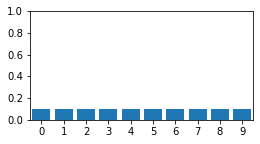

In [46]:
import matplotlib.pyplot as plt

p_val = sess.run(p, feed_dict={x:[image], keep_prob:1.0})

fig = plt.figure(figsize=(4,2))
pred = p_val[0]
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks(range(10))
subplot.set_xlim(-0.5,9.5)
subplot.set_ylim(0,1)
subplot.bar(range(10), pred, align='center')
plt.show()

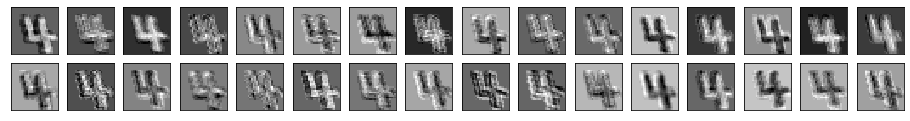

In [47]:
conv1_vals, cutoff1_vals = sess.run(
    [h_conv1, h_conv1_cutoff], feed_dict={x:[image], keep_prob:1.0})

fig = plt.figure(figsize=(16,4))

for f in range(num_filters1):
    subplot = fig.add_subplot(4, 16, f+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(conv1_vals[0,:,:,f],
                   cmap=plt.cm.gray_r, interpolation='nearest') 
plt.show()

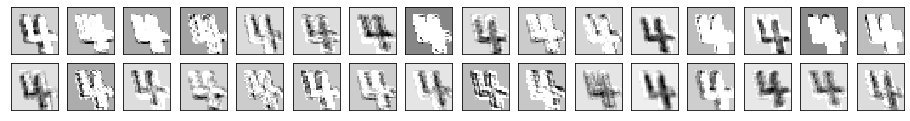

In [48]:
fig = plt.figure(figsize=(16,4))

for f in range(num_filters1):
    subplot = fig.add_subplot(4, 16, f+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(cutoff1_vals[0,:,:,f],
                   cmap=plt.cm.gray_r, interpolation='nearest') 
    
plt.show()